In [1]:
from easyocr import Reader
import os

d:\ProgramData\Anaconda3\envs\ocr_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
reader = Reader(['en'])

In [3]:
def flatten(t):
    return [item for list in t for item in list]

# Task 1 method

In [4]:
def task1out(fname, result):
    formatted_output = []
    for line in result:
        out = flatten(line[0])
        formatted_output.append([int(n) for n in out])

    with open(fname, 'w') as f:
        for row in formatted_output:
            f.write(','.join(str(v).upper() for v in row) + '\n')

# Task 2 method

In [5]:
def task2out(fname, result):
    formatted_output = []

    for line in result:
        out = []
        for token in line[1].upper().split(' '):
            out.append(token)
        formatted_output.append(out)

    with open(fname, 'w') as f:
        for row in formatted_output:
            for token in row:
                f.write(token+'\n')

# Get results

In [9]:
import os

img_dir = 'Datasets/SROIE2019/preprocessed'
result_dir = 'Datasets/SROIE2019/easyocr'
images = [os.path.splitext(filename)[0] for filename in os.listdir(img_dir)]

In [10]:
for idx, image in enumerate(images):
    if idx % 50 == 0:
        print(idx+1,'/',len(images))
    img_path = os.path.join(img_dir, image + '.jpg')
    result1_path = os.path.join(result_dir, 'task 1', image + '.txt')
    result2_path = os.path.join(result_dir, 'task 2', image + '.txt')
    result = reader.readtext(img_path)

    task1out(result1_path, result)
    task2out(result2_path, result)

1 / 986
51 / 986
101 / 986
151 / 986
201 / 986
251 / 986
301 / 986
351 / 986
401 / 986
451 / 986
501 / 986
551 / 986
601 / 986
651 / 986
701 / 986
751 / 986
801 / 986
851 / 986
901 / 986
951 / 986


In [ ]:
image = 'X51005200938'
img_path = os.path.join(img_dir, image + '.jpg')
result1_path = os.path.join(result_dir, 'task 1', image + '.txt')
result2_path = os.path.join(result_dir, 'task 2', image + '.txt')
result = reader.readtext(img_path)

task1out(result1_path, result)
task2out(result2_path, result)

([[73, 47], [329, 47], [329, 89], [73, 89]], 'tan woon yann', 0.9764174304303022)


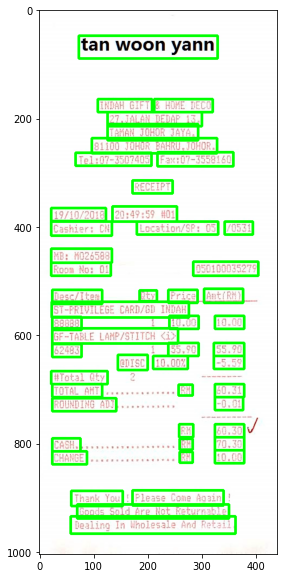

In [7]:
import cv2
import matplotlib.pyplot as plt

image = 'X00016469619'
img_path = os.path.join(img_dir, image + '.jpg')
result = reader.readtext(img_path)

print(result[0])

img = cv2.imread(img_path)
spacer = 100
font = cv2.FONT_HERSHEY_SIMPLEX

for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    spacer+=15


plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
